In [1]:
import cv2 #opencv读取的格式是BGR
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
#以上除了常规的导入库文件外，就是一种魔法方法的应用，即不需要调用show（）函数的方法就可以显示处理好的图片

#读取彩色图像的方法（即拥有RGB三通道的图像）
img = cv2.imread("cat.jpg")

# 图像基本操作
 主要的内容为：
1）掌握彩色图像与灰度图的读取，及二者间的相互转换；
2）利用OPENCV进行图像显示的基本操作；
3）对图像进行保存操作。

In [2]:
img

array([[[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       ...,

       [[243, 243, 243],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [242, 241, 243],
        [242, 241, 243],
        [242, 241, 243]],

       [[243, 243, 243],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [242, 241, 243],
        [242, 241, 243],
        [242, 241, 243]],

       [[243, 243, 243],
        [243, 243, 243],
        [244, 244, 244],
        ...,
        [242, 241, 243],
        [242, 241, 243],
        [242, 241, 243]]

In [3]:
#图像的显示，也可以创建多个窗口（此方法用于读取彩蛇图像）
cv2.imshow("image",img)
#等待时间，毫秒级，0表示任意键结束
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [4]:
#定义一个图像显示函数
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
img.shape
#（h,w,c）BGR顺序三通道

(840, 699, 3)

In [6]:
#读取灰度图片的方法(对灰度图预处理)在图像处理时经常要实现灰度图与彩色图之间进行切换
img1 = cv2.imread("cat.jpg",cv2.IMREAD_GRAYSCALE)
img1

array([[251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       ...,
       [243, 244, 244, ..., 242, 242, 242],
       [243, 244, 244, ..., 242, 242, 242],
       [243, 243, 244, ..., 242, 242, 242]], dtype=uint8)

In [7]:
img1.shape

(840, 699)

In [8]:
#图像的显示，也可以创建多个窗口
cv2.imshow("image1",img1)
#等待时间，毫秒级，0表示任意键终止
cv2.waitKey(10000)
cv2.destroyAllWindows()

In [9]:
#图像保存
cv2.imwrite("mycat.png",img1)

True

In [10]:
type(img1)

numpy.ndarray

In [11]:
#计算像素点的个数
img1.size

587160

#  数据读取-视频
#-cv2.VideoCapture可以捕获摄像头，用数字来控制不同的设备，例如：0，1

#-如果是视频文件，直接指定好路径即可

In [12]:
vc = cv2.VideoCapture("WangLaoBan.mp4")

In [13]:
#检查是否打开正确
if vc.isOpened():
    open ,frame = vc.read()                      #从第一帧按顺序往下读
else:
    open = False

In [14]:
while open:
    ret , frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)    #把彩色通道转换为灰度图
        cv2.imshow("result",gray)
        if cv2.waitKey(100) & 0xFF == 27:         #按退出键跳出循环
            break
vc.release()
cv2.destroyAllWindows()

#  截取图像部分（局部）像素（数据）

In [15]:
#截取部分图像数据
img2 = cv2.imread("cat.jpg")
cat_1 = img2[100:600,100:600]     #类似与切片
cv_show("cat_1",cat_1)

# 颜色通道提取

In [16]:
b,g,r = cv2.split(img2)

In [17]:
b

array([[251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       ...,
       [243, 244, 244, ..., 242, 242, 242],
       [243, 244, 244, ..., 242, 242, 242],
       [243, 243, 244, ..., 242, 242, 242]], dtype=uint8)

In [18]:
b.shape

(840, 699)

In [19]:
g.shape

(840, 699)

In [20]:
img3 = cv2.merge((b,g,r))
img3.shape

(840, 699, 3)

In [21]:
cv_show("img3",img3)

In [22]:
cv_show("g",b) 

In [23]:
#只保留R,即把其他两个通道的数值置为0
cur_img = img.copy()           #b,g,r=0,1,2此处即为b,g,r的索引值
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
cv_show("R",cur_img)

In [24]:
#只保留G
cur_img = img.copy()           #b,g,r=0,1,2此处即为b,g,r的索引值
cur_img[:,:,0] = 0
cur_img[:,:,2] = 0
cv_show("G",cur_img)

In [25]:
#只保留B
cur_img = img.copy()           #b,g,r=0,1,2此处即为b,g,r的索引值
cur_img[:,:,2] = 0
cur_img[:,:,1] = 0
cv_show("R",cur_img)

# 边界填充

In [26]:
top_size,bottom_size,left_size,right_size = (50,50,50,50)        #上下左右

#不同填充方式的区别与显示(填充函数相同，只是填充方式不同)
replicate = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType = cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType = cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType = cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType = cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType = cv2.BORDER_CONSTANT,value = 0)

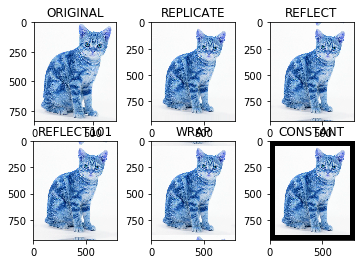

In [27]:
import matplotlib.pyplot as plt
plt.subplot(231),plt.imshow(img3,"gray"),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,"gray"),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,"gray"),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,"gray"),plt.title('REFLECT101')
plt.subplot(235),plt.imshow(wrap,"gray"),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,"gray"),plt.title('CONSTANT')

plt.show()

# 数值计算

In [28]:
img_cat = cv2.imread("cat.jpg")
img_dog = cv2.imread("dog.jpg")

In [29]:
img_cat2 = img_cat + 10    #每一个像素点钧加上10
img_cat[:5,:,0]

array([[251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251]], dtype=uint8)

In [30]:
img_cat2[:5,:,0]

array([[5, 5, 5, ..., 5, 5, 5],
       [5, 5, 5, ..., 5, 5, 5],
       [5, 5, 5, ..., 5, 5, 5],
       [5, 5, 5, ..., 5, 5, 5],
       [5, 5, 5, ..., 5, 5, 5]], dtype=uint8)

In [31]:
#相当于%256
(img_cat+img_cat2)[:5,:,0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [32]:
cv2.add(img_cat,img_cat2)[:5,:,0]     #没超过255取自身，超过255取255
#注意两个加法的区别

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

# 图像融合

In [33]:
img_cat.shape

(840, 699, 3)

In [34]:
img_dog.shape

(1080, 1920, 3)

In [35]:
img_dog = cv2.resize(img_dog,(699,840))     #不同像素的变换
img_dog.shape

(840, 699, 3)

In [36]:
cv_show("img_dog",img_dog)

In [37]:
#两图片相加，例如设cat的为x1，dog为x2，偏置像为k；所以得到的新图像R为：R = a x1 + b x2 +k
res = cv2.addWeighted(img_cat,0.4,img_dog,0.6,0)

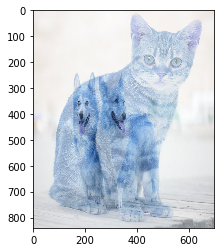

In [38]:
plt.imshow(res)

In [39]:
#保存该图片留作纪念
cv2.imwrite("cat&dog.jpg",res)

True

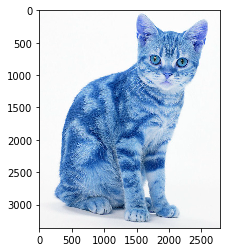

In [40]:
#fx与fy大于1图片放大，小于1即为缩小
reg = cv2.resize(img,(0,0),fx=4,fy=4)
plt.imshow(reg)

# 总结